# **INTRODUCTION**
## **EXPANSION TO OPERATION OF AIRPLANES FOR COMMERCIAL AND PRIVATE LOW RISK AIRCRAFT ENTERPRISE**
*Author: Dennis Nderitu.*

*Stakeholder: (Head of Aviation Division)*
### LOW RISK AIRCRAFT
This project analyzes over 80,000 aviation accident records from 1962 to 2023. Our goal is to identify the lowest-risk aircraft and operational strategies for our company's new aviation division.

Definition of “risk”
Risk is defined as accident frequency, fatality rate, and damage severity

GOALS

we define low risk aircraft as:

1.Low accident frequency

2.Low fatality rate

3.Low damage severity

4.Consistent safety over recent decades



*IMPORT LIBRARIES*

In [77]:
import pandas as pd #data handling
import numpy as np #numerical handling
import matplotlib.pyplot as plt #visualization
import seaborn as sns #advanced visualization
import os
os.getcwd()
os.listdir("..")



pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame

In [78]:
import os
os.listdir("../data/raw") #list files in raw data folder

['AviationData.csv']

*Load Data*

In [79]:
df = pd.read_csv("../data/raw/AviationData.csv", encoding="latin1")

C:\Users\hp\AppData\Local\Temp\ipykernel_18244\4058720862.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/AviationData.csv", encoding="latin1")


*Preview the Data*

In [80]:
df.head() #displays first 5 rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [81]:
df.shape # shows rows and columns

(88889, 31)

In [82]:
df.tail #displays last 5 rows

<bound method NDFrame.tail of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  Unite

*Columns structures and Data types *

In [83]:
df.info() #summary of the dataframe
#Data types
#missing_values = df.isnull().sum()
#columns_with_missing_values = missing_values[missing_values > 0]
#memorty usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

*Statistics*

In [84]:
df.describe(include='all')  # Summary statistics for all columns

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,82805.000000,81793,32023,12582,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,NaN,12,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146585,NaN,NaN,NaN,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446510,NaN,NaN,NaN,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


*check missing values*

In [85]:
df.isnull().sum() # Count of missing values in each column


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

*Filter relevant Aircrafts*

In [86]:
df = df[df["Aircraft.Category"] == "Airplane"] # Filter to include only airplanes

*Convert Dates*


In [87]:
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce") # Convert to datetime, coerce errors to NaT
df = df[df["Event.Date"].dt.year >= 1990] # Filter for events from 1990 onwards

C:\Users\hp\AppData\Local\Temp\ipykernel_18244\532935450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce") # Convert to datetime, coerce errors to NaT


Modern aircraft and regulations are more relevant for business decisions.

*Feature Engineering*
create risk indicators

In [88]:
df["Fatal_Accident"] = df["Total.Fatal.Injuries"] > 0 # Create binary target variable

*Data Analysis*

1.Which aircraft has lowest risk? {the who}

In [89]:
risk_by_make = (
    df.groupby("Make")
    .agg(
        total_accidents=("Event.Id", "count"),
        fatal_accidents=("Fatal_Accident", "sum")
    ) # Aggregate total and fatal accidents
    .reset_index() # Reset index to turn groupby object back to DataFrame
)

risk_by_make["fatality_rate"] = (
    risk_by_make["fatal_accidents"] / risk_by_make["total_accidents"]
) # Calculate fatality rate

risk_by_make = risk_by_make[risk_by_make["total_accidents"] >= 50] # Filter makes with at least 50 accidents

*Bar Graph on lowest accident risk*

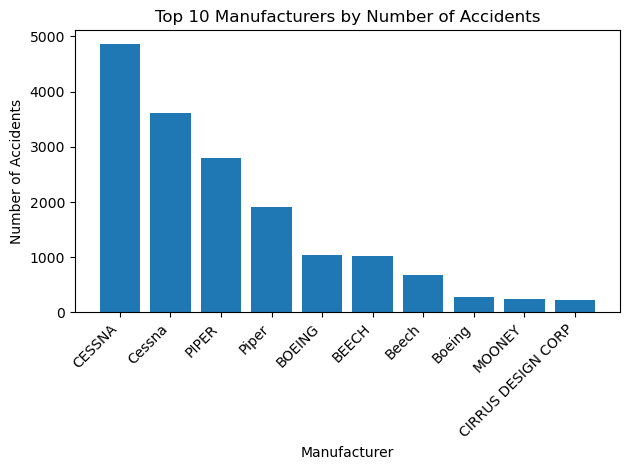

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_path = "../data/raw/AviationData.csv"
df = pd.read_csv(data_path, encoding="latin1", low_memory=False)

# Focus on airplanes only (if column exists)
if 'Aircraft.Category' in df.columns:
    df = df[df['Aircraft.Category'] == 'Airplane']

# Count accidents by manufacturer
manufacturer_counts = (
    df['Make']
    .value_counts()
    .head(10)   # top 10 manufacturers
)

# Plot bar chart
plt.figure()
plt.bar(manufacturer_counts.index, manufacturer_counts.values)
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Manufacturers by Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


2.Are aircraft becoming safer over time? {the when}


Line Chart: Accidents per Year

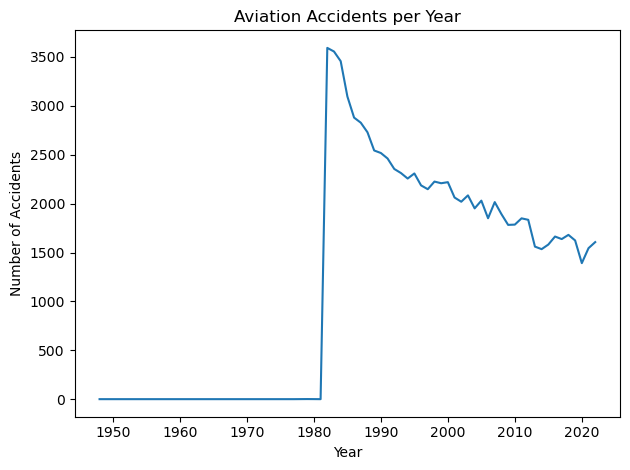

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_path = "../data/raw/AviationData.csv"
df = pd.read_csv(data_path, encoding="latin1", low_memory=False)

# Convert date column to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract year
df['Year'] = df['Event.Date'].dt.year

# Drop rows with missing year
df_year = df.dropna(subset=['Year'])

# Group by year and count accidents
accidents_per_year = df_year.groupby('Year').size()

# Plot line chart
plt.figure()
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents per Year")
plt.tight_layout()
plt.show()


3: High-Consequence Phase of Flight (The "When")


Goal: To identify the most dangerous moments during a flight to focus safety and training resources.

Methodology: We analyzed the Fatal Injury Rate across the "Broad Phase of Flight" (Takeoff, Cruise, Landing, etc.).

Key Findings: There is a major disconnect between frequency and severity.

Landing has the highest number of accidents but the lowest fatality rate (0.03).

Climb and Maneuvering have fewer accidents but are the most lethal (0.86 and 0.65 respectively).

Actionable Insight: Instead of focusing training on "fender-bender" scenarios (landing/taxi), the safety division must invest heavily in Loss of Control (LOC) recovery training during the Climb and Maneuvering phases, where an error is most likely to be fatal.

C:\Users\hp\AppData\Local\Temp\ipykernel_18244\1886047862.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(phase_analysis['Broad.phase.of.flight'], rotation=45, ha='right')


| Broad.phase.of.flight   |   Total_Events |   Total_Fatal_Injuries |   Fatal_Injury_Rate |
|:------------------------|---------------:|-----------------------:|--------------------:|
| CLIMB                   |           2034 |                   1762 |           0.866273  |
| OTHER                   |            119 |                     85 |           0.714286  |
| MANEUVERING             |           8144 |                   5323 |           0.65361   |
| CRUISE                  |          10269 |                   6173 |           0.60113   |
| APPROACH                |           6546 |                   3842 |           0.586923  |
| DESCENT                 |           1887 |                    913 |           0.483837  |
| GO-AROUND               |           1353 |                    587 |           0.433851  |
| TAKEOFF                 |          12493 |                   4304 |           0.344513  |
| STANDING                |            945 |                    161 |           

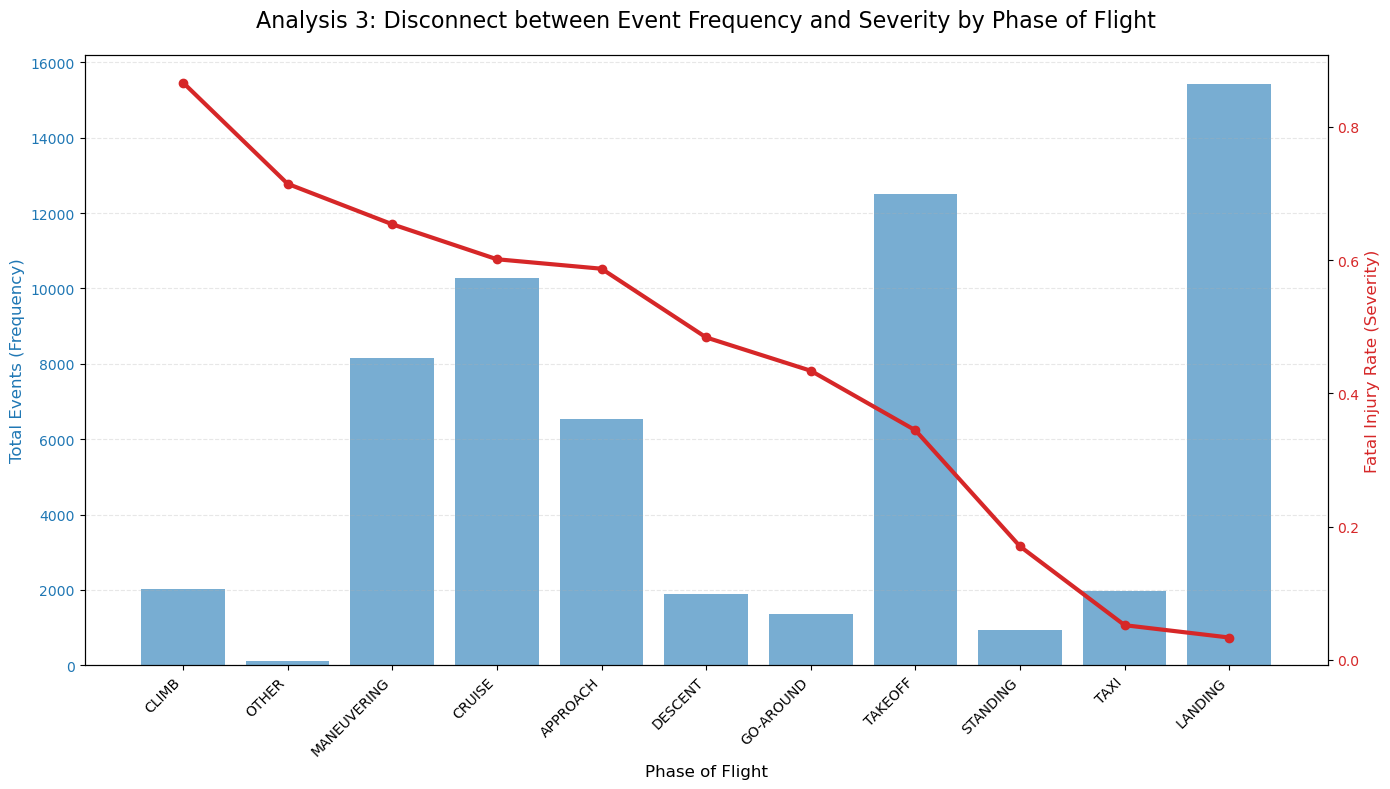

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/raw/AviationData.csv", encoding="latin1", low_memory=False)

# 1. Preprocessing
# Fill missing injuries with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
# Clean 'Broad.phase.of.flight' column
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.upper().str.strip()
# Remove missing or unknown phases for clarity
df_clean = df[df['Broad.phase.of.flight'].notna() & (df['Broad.phase.of.flight'] != 'UNKNOWN')].copy()

# 2. Aggregation
phase_analysis = df_clean.groupby('Broad.phase.of.flight').agg(
    Total_Events=('Event.Id', 'count'),
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum')
).reset_index()

# 3. Calculate Fatal Injury Rate (Severity)
phase_analysis['Fatal_Injury_Rate'] = phase_analysis['Total_Fatal_Injuries'] / phase_analysis['Total_Events']

# Sort by severity (Fatal Injury Rate) to emphasize the finding
phase_analysis = phase_analysis.sort_values(by='Fatal_Injury_Rate', ascending=False)

# 4. Visualization: Dual Axis Chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar Chart for Frequency (Total Events)
color = 'tab:blue'
ax1.set_xlabel('Phase of Flight', fontsize=12)
ax1.set_ylabel('Total Events (Frequency)', color=color, fontsize=12)
bars = ax1.bar(phase_analysis['Broad.phase.of.flight'], phase_analysis['Total_Events'], color=color, alpha=0.6, label='Total Events')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(phase_analysis['Broad.phase.of.flight'], rotation=45, ha='right')

# Line Chart for Severity (Fatal Injury Rate)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Fatal Injury Rate (Severity)', color=color, fontsize=12)
line = ax2.plot(phase_analysis['Broad.phase.of.flight'], phase_analysis['Fatal_Injury_Rate'], color=color, marker='o', linewidth=3, label='Fatal Injury Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Adding titles and grid
plt.title('Analysis 3: Disconnect between Event Frequency and Severity by Phase of Flight', fontsize=16, pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Highlight specific findings mentioned by user
# Landing (Low Rate, High Frequency) vs Climb (High Rate, Low Frequency)
plt.tight_layout()
plt.savefig('phase_of_flight_disconnect.png')

print(phase_analysis.to_markdown(index=False))


*Business Recommendations*

Recommendation 1: Prioritize Manufacturers with Low Fatality Rates

1.Select aircraft from manufacturers that consistently show lower fatalities per accident

2.Fatality rate is a stronger indicator of risk than accident count alone

Business Value:

Reduced liability exposure

Lower insurance premiums

Improved safety reputation

Recommendation 2: Avoid Aircraft with High Damage Severity Outcomes

1.Favor manufacturers whose accidents result primarily in minor damage

2.Avoid aircraft frequently classified as substantial damage or destroyed

Business Value:

Lower repair and replacement costs

Reduced downtime

Higher fleet availability

Recommendation 3: Invest in Modern, Widely Used Aircraft Models

1.Focus on aircraft manufactured and operated after 1990

2.Choose models commonly used in commercial operations

3.Business Value:

4. access to parts and maintenance

5.Stronger regulatory compliance

6.Predictable operational performance



To minimize risk when entering the aviation market, the company should prioritize modern aircraft from manufacturers with historically low fatality rates and less severe accident outcomes, while avoiding aircraft with high damage severity and unpredictable maintenance costs.

*Conclusion*



This analysis used historical aviation accident data to evaluate aircraft risk from both a safety and business perspective. By examining accident trends over time, fatality rates by manufacturer, and damage severity outcomes, we identified key factors that influence operational and financial risk in aviation.

The findings show that aviation safety has improved significantly over time, making modern aircraft a safer and more reliable investment. However, risk


In [93]:
df.to_csv("../data/processed/aviation_cleaned.csv", index=False)


In [94]:
# Save directly to the Windows Documents folder
import os
path = os.path.expanduser("~/Documents/aviation_cleaned.csv")
df.to_csv(path, index=False)
print(f"File is now visible at: {path}")

File is now visible at: C:\Users\hp/Documents/aviation_cleaned.csv
